<a href="https://colab.research.google.com/github/enricmorcillo/SSN/blob/main/TASCA_2_SSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

definim les funcions per feymann i verlet

In [3]:
def feynman_update(x,v,a,dt):
  x_new=x+v*dt+0.5*a*dt**2
  v_new=v+a*dt
  return x_new, v_new

In [4]:
def velocity_verlet_update(x,v,a,dt,force_function,mass):
  x_new=x+v*dt+0.5*a*dt**2
  a_new=force_function(x_new)/mass
  v_new=v+0.5*(a+a_new)*dt
  return x_new,v_new,a_new


Fem un gràfic comparatiu entre els dos mètodes definint certs paràmetres

---



In [5]:
def force_harmonic(x):
  k=1
  return -k*x

In [25]:
m=1
dt=0.01
n_steps=1000
xfey, vfey=1,0
xver,vver=1,0
aver=force_harmonic(xver)/m

xfey_list, vfey_list=[],[]
xver_list,vver_list=[],[]


In [26]:
for _ in range(n_steps):
  xfey,vfey=feynman_update(xfey,vfey,force_harmonic(xfey)/m,dt)
  xver,vver,aver=velocity_verlet_update(xver,vver,aver,dt,force_harmonic,m)
  xfey_list.append(xfey)
  vfey_list.append(vfey_list)
  xver_list.append(xver)
  vver_list.append(vver_list)

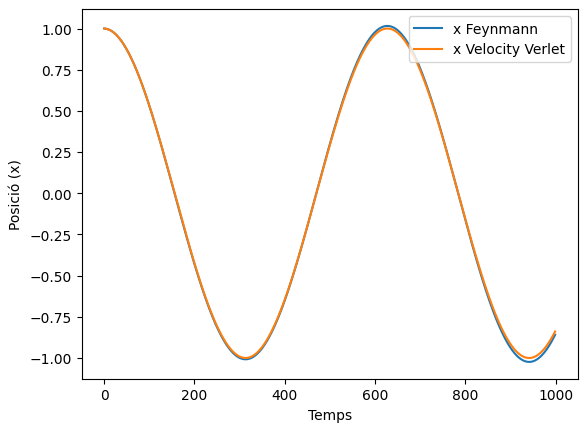

In [28]:
plt.plot(xfey_list,label='x Feynmann')
plt.plot(xver_list,label='x Velocity Verlet')
plt.xlabel('Temps')
plt.ylabel('Posició (x)')
plt.legend()
plt.show()

Definim funció de l'energia i certs paràmetres

In [10]:
def energia_total(x,v,force_function,mass):
  cinetica=0.5*mass*v**2
  potencial=-force_function(x)*x
  return cinetica+potencial

In [11]:
k=1
m=1
def force_harmonic(x):
  return -k*x

In [12]:
dt=0.01
n_steps=1000
xfey,vfey=1,0
xver,vver=1,0
aver=force_harmonic(xver)/m

In [13]:
E_fey=[]
E_ver=[]


In [14]:
for _ in range(n_steps):
  xfey,vfey=feynman_update(xfey,vfey,force_harmonic(xfey)/m,dt)
  E_fey.append(energia_total(xfey,vfey,force_harmonic,m))

  xver,vver,aver=velocity_verlet_update(xver,vver,aver,dt,force_harmonic,m)
  E_ver.append(energia_total(xver,vver,force_harmonic,m))

Fem gràfic comparatiu altra vegada

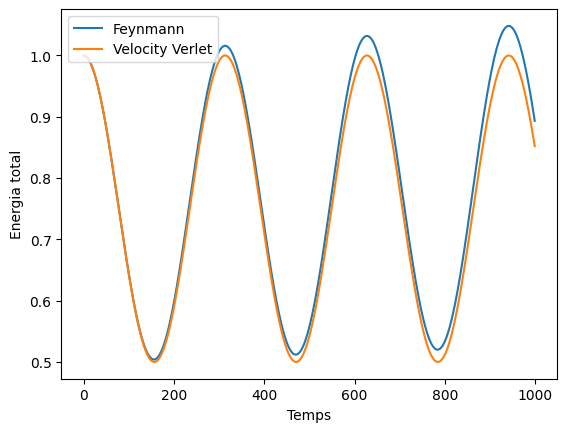

In [22]:
plt.plot(E_fey,label='Feynmann')
plt.plot(E_ver,label='Velocity Verlet')
plt.xlabel('Temps')
plt.ylabel('Energia total')
plt.legend()
plt.show()

Definim l'equació d'Schrodinger i els seus paràmetres

In [18]:
def schrodinger_si(hbar,m,V,psi):
  return(-hbar**2/(2*m))*np.gradient(np.gradient(psi))+V*psi
def schrodinger_atomic(V,psi):
  return(-0.5)*np.gradient(np.gradient(psi))+V*psi

In [19]:
x=np.linspace(-5,5,150)
V=0.5*x**2
psi=np.exp(-x**2)
psi_SI=schrodinger_si(1.054e-34,9.11e-31,V,psi)
psi_at=schrodinger_atomic(V,psi)

Fem el gràfic

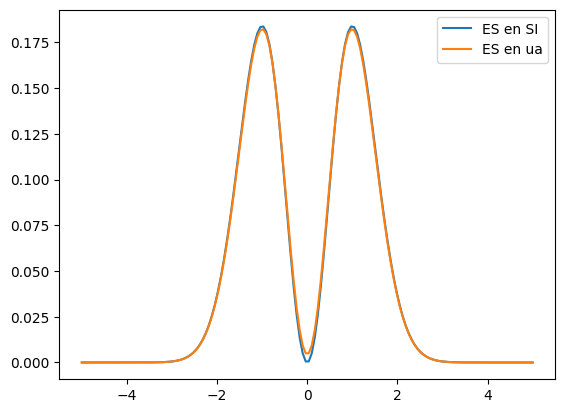

In [21]:
plt.plot(x,psi_SI,label='ES en SI')
plt.plot(x,psi_at,label='ES en ua')
plt.legend()
plt.show()
